In [1]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img, save_img
import os
from matplotlib import pyplot as plt
import numpy as np
import os
from constants import class_type_to_index
import math

Using TensorFlow backend.


In [2]:
def augment_single_class(dir_path, filename_tupels, generator, factor, limit):
    count = len(filename_tupels)
    for iteration in range(factor):
        for filename_tuple in filename_tupels:
            if count >= limit:
                break

            img = load_img(dir_path + '/' + filename_tuple[0] + '/' + filename_tuple[1])
            x = img_to_array(img)
            x_transformed = generator.random_transform(x)

            should_mess_up_colors = np.random.choice([0,1])
            if should_mess_up_colors == 1:
                x_transformed = mess_up_colors(x_transformed)
            else:
                x_transformed = swith_colors(x_transformed)

            img_transformed = array_to_img(x_transformed)
            save_img(dir_path +'/' + filename_tuple[0] + '/_' + str(iteration) + '_' + filename_tuple[1], img_transformed)
            
            count += 1

def swith_colors(x):
    channels = np.random.permutation(x.shape[2])
    x = x[:,:,channels]
    return x

def mess_up_colors(x):
    for channel in range(3):
        intensity = np.random.uniform(0,1.5)
        x[:,:,channel] *= intensity
    return np.clip(x, 0, 255)

In [3]:
def get_dirnames(path):
    dirnames = sorted(os.listdir(path))
    try:
        dirnames.remove('.DS_Store')
    except:
        x=1
    dirnames = dirnames[0:91] #todo: use all classes
    dirnames = np.array(dirnames)
    
    return dirnames

def get_filenames(path, dirname):
    files = os.listdir(path + dirname)
    try:
        files.remove('.DS_Store')
    except:
        x=1
    return files

def divide_files_into_classes(class_types, path):
    classes_to_files = {}
    dirnames = get_dirnames(path)
    class_indices = list(map(lambda t: class_type_to_index[t], class_types))
    for dirname in dirnames:
        classname = ''
        if dirname == '.DS_Store':
            continue
        classnames = dirname.split(' ')
        for index in class_indices:
            classname += classnames[index] + ' '
        classname = classname.strip()
        
        filenames = get_filenames(path, dirname)
        filename_tuples = list(map(lambda f: (dirname, f), filenames))
        
        if classname in classes_to_files:
            classes_to_files[classname] = np.concatenate([classes_to_files[classname], np.array(filename_tuples)])
        else:
            classes_to_files[classname] = np.array(filename_tuples)
    
    return classes_to_files

def augment(data_dir, class_types, generator, factor):
    classes_to_files = divide_files_into_classes(class_types, data_dir)

    max_files_in_class = 0
    biggest_class = ''
    for cl, filename_tuples in classes_to_files.items():
        if len(filename_tuples) > max_files_in_class:
            max_files_in_class = len(filename_tuples)
            biggest_class = cl
    
    augmented_num_files = factor * max_files_in_class
    print('Augmented number of files in each class:', augmented_num_files)
    print('Biggest class:', biggest_class)
    
    count = 0
    for c, filename_tuples in classes_to_files.items():
        class_factor = math.ceil(augmented_num_files / len(filename_tuples))
        augment_single_class(data_dir, filename_tuples, generator, class_factor, augmented_num_files)
        print('Class ' + str(count) + ' ' + c + ' augmented.')
        count += 1


In [4]:
generator = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=15,
    shear_range=15,
    brightness_range=(0.5, 2),
    fill_mode='constant',
    cval=0,
)

## Preview

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


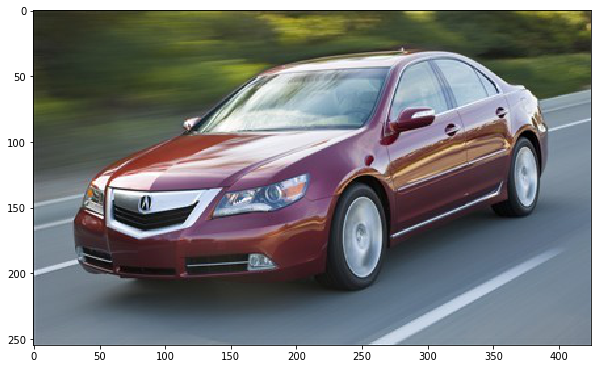

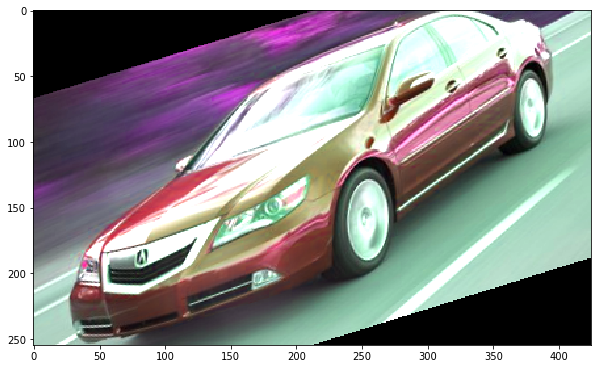

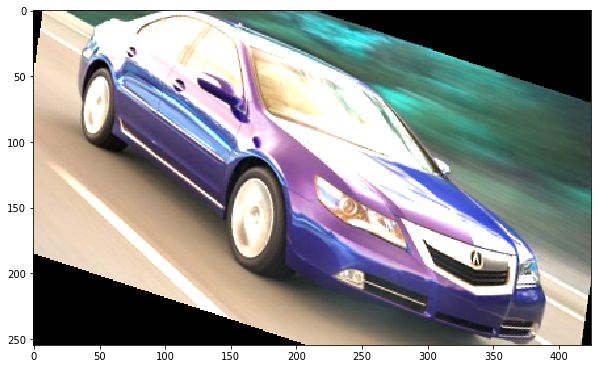

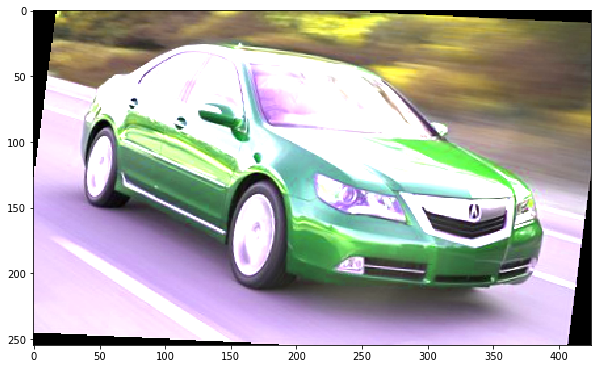

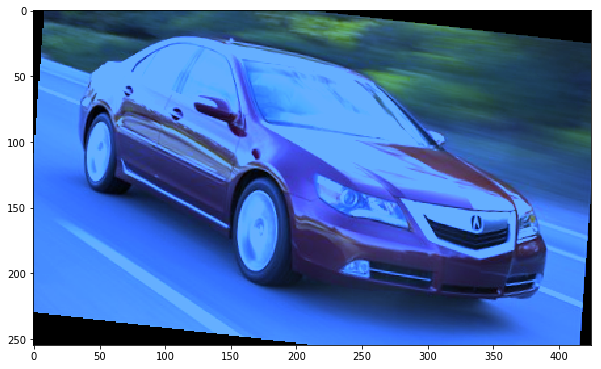

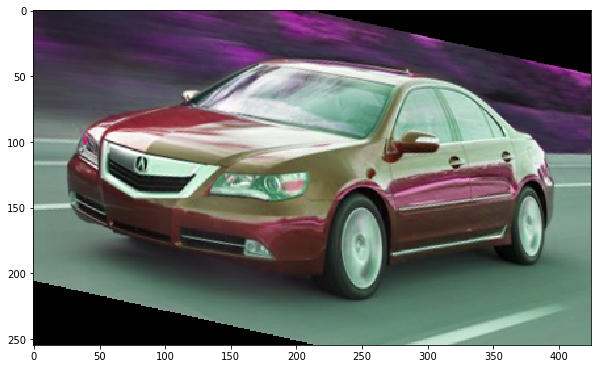

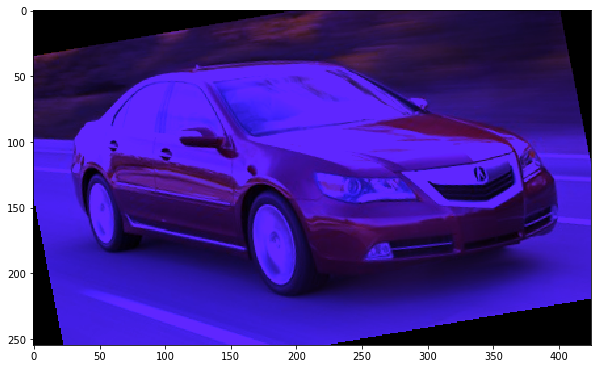

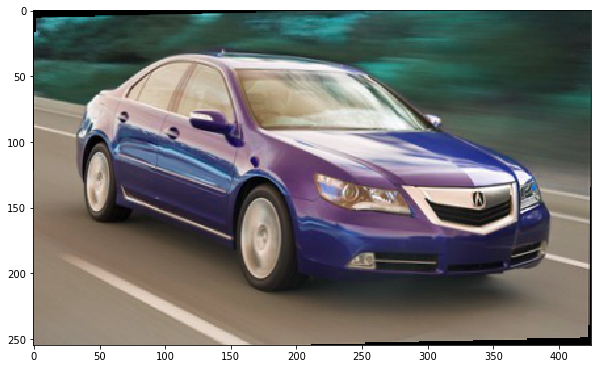

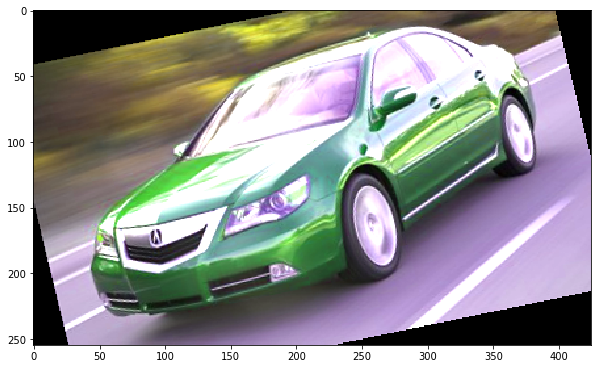

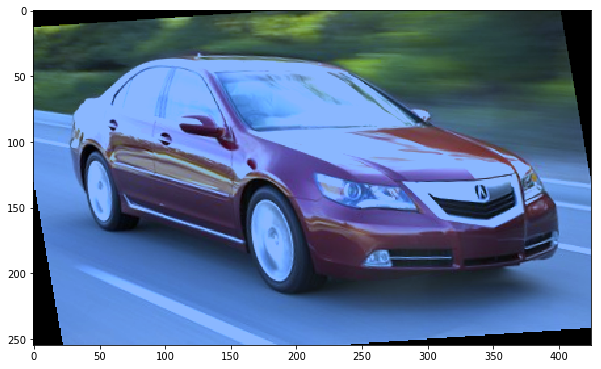

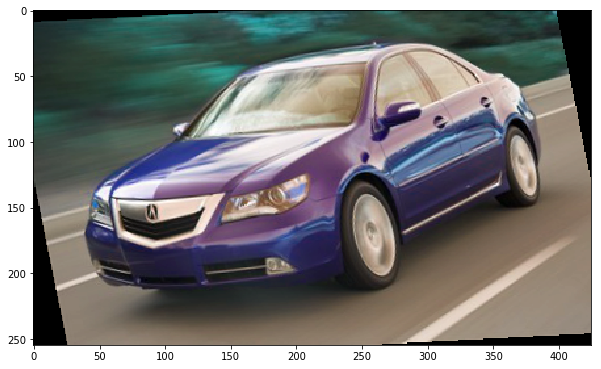

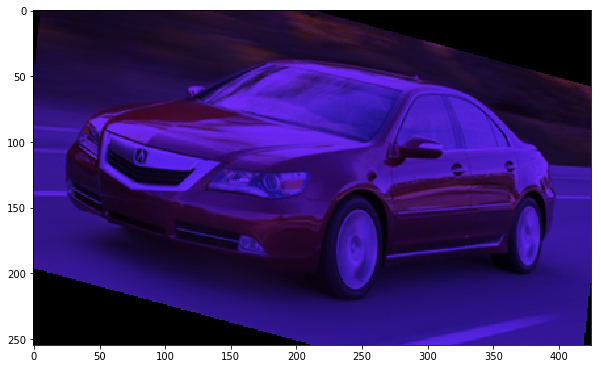

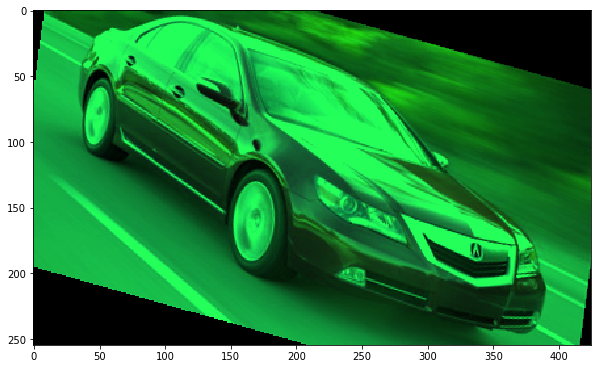

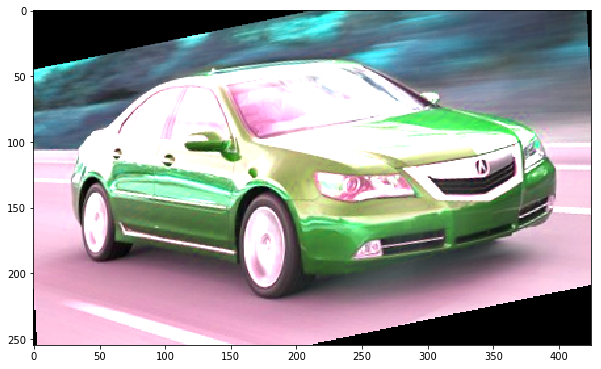

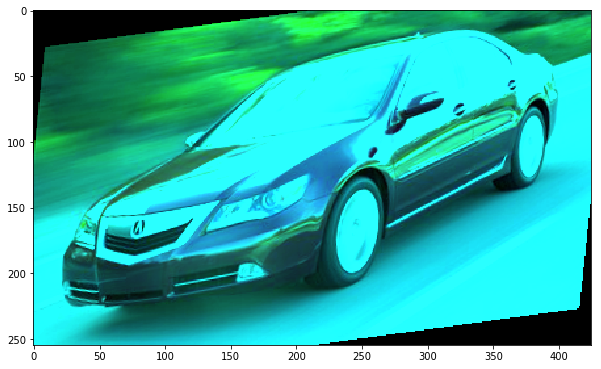

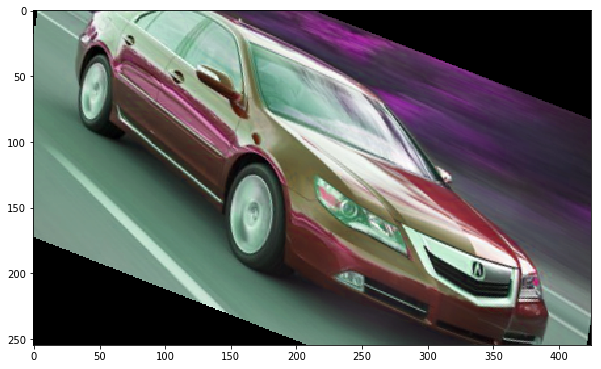

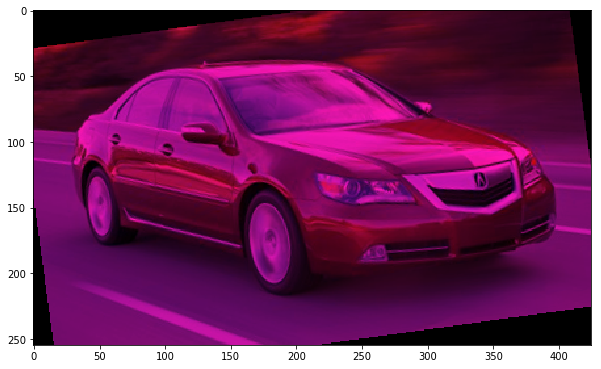

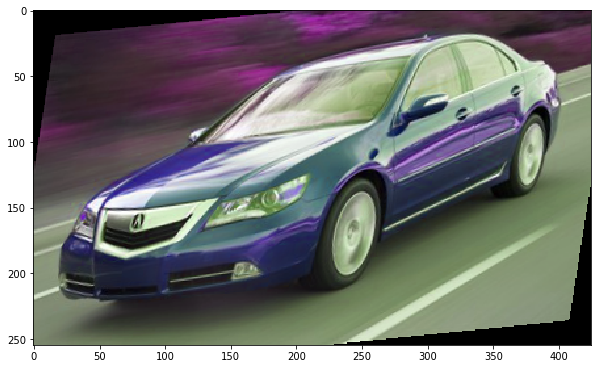

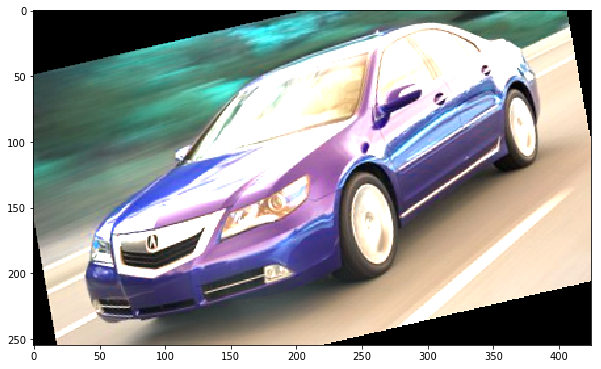

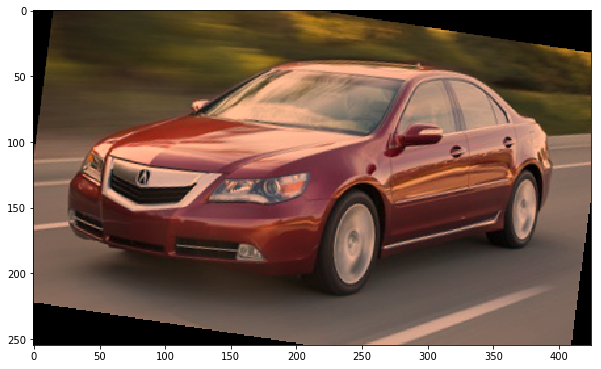

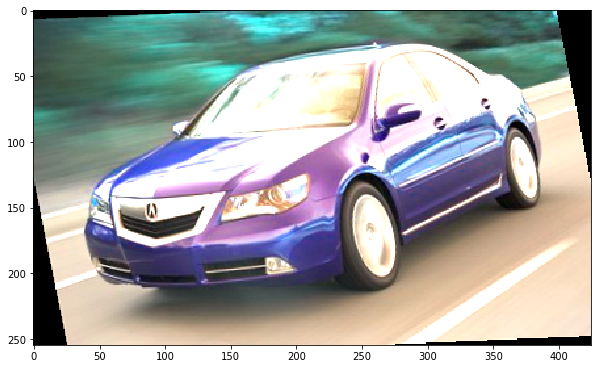

In [5]:
img = load_img('stanford-car-dataset-by-classes-folder/train_dataset/Acura RL Sedan 2012/00249.jpg')
fig = plt.figure(figsize=(10,20))
plt.imshow(img)
x = img_to_array(img)

for i in range(20):
    x_transformed = generator.random_transform(x)
    should_mess_up_colors = np.random.choice([0,1])
    if should_mess_up_colors == 1:
        x_transformed = mess_up_colors(x_transformed)
    else:
        x_transformed = swith_colors(x_transformed)
    img_transformed = array_to_img(x_transformed)
    fig = plt.figure(figsize=(10,20))
    plt.imshow(img_transformed)

## Augmentation

In [6]:
augment('./stanford-car-dataset-by-classes-folder/train_dataset/', ['make', 'model'], generator, 2)

Augmented number of files in each class: 402
Biggest class: Audi A5
Class 0 AM Hummer augmented.
Class 1 Acura Integra_Type_R augmented.
Class 2 Acura RL augmented.
Class 3 Acura TL augmented.
Class 4 Acura TL_Type-S augmented.
Class 5 Acura TSX augmented.
Class 6 Acura ZDX augmented.
Class 7 Aston_Martin V8_Vantage augmented.
Class 8 Aston_Martin Virage augmented.
Class 9 Audi 100 augmented.
Class 10 Audi A4 augmented.
Class 11 Audi A5 augmented.
Class 12 Audi R8 augmented.
Class 13 Audi S4 augmented.
Class 14 Audi S6 augmented.
Class 15 Audi TT augmented.
Class 16 Audi V8 augmented.
Class 17 BMW 1_Series augmented.
Class 18 BMW 3_Series_2 augmented.
Class 19 BMW 3_Series_3 augmented.
Class 20 BMW 5_Series augmented.
Class 21 BMW 6_Series augmented.
Class 22 BMW M3 augmented.
Class 23 BMW M5 augmented.
Class 24 BMW X3 augmented.
Class 25 BMW X5 augmented.
Class 26 BMW X6 augmented.
Class 27 BMW Z4 augmented.
Class 28 Bentley Arnage augmented.
Class 29 Bentley Continental_1 augmented.
